### Import all the libraries here

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import pandas as pd
import scipy.stats as sts

### Load the data here

In [4]:
amazon = pd.read_csv("../data/amz_uk_price_prediction_dataset.csv")
df = amazon.copy()

### Explore the data here

In [5]:
df.shape

(2443651, 9)

In [6]:
df.head(4)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers


In [7]:
df.tail(4)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


In [8]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [9]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

### Part 1: Analyzing Best-Seller Trends Across Product Categories

#### 1. Crosstab Analysis

In [10]:
crosstab = pd.crosstab(df["category"], df["isBestSeller"])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [11]:
crosstab_df = crosstab.reset_index(drop=False)
crosstab_df

isBestSeller,category,False,True
0,3D Printers,247,1
1,3D Printing & Scanning,4065,2
2,Abrasive & Finishing Products,245,5
3,Action Cameras,1696,1
4,Adapters,251,3
...,...,...,...
291,Wind Instruments,243,7
292,Window Treatments,234,5
293,Women,17559,213
294,Women's Sports & Outdoor Shoes,1939,20


In [12]:
crosstab_df["proportion"] = (crosstab_df[True] / (crosstab_df[False] + crosstab_df[True]))*100

In [13]:
crosstab_df.sort_values(by="proportion", ascending=False)

isBestSeller,category,False,True,proportion
109,Grocery,9008,556,5.813467
254,Smart Home Security & Lighting,98,6,5.769231
126,Health & Personal Care,9017,552,5.768628
185,Mobile Phone Accessories,248,11,4.247104
229,Power & Hand Tools,8353,306,3.533895
...,...,...,...,...
23,Bedding Collections,6309,0,0.000000
39,CPUs,249,0,0.000000
38,"CD, Disc & Tape Players",8798,0,0.000000
30,Blank Media Cases & Wallets,243,0,0.000000


In [14]:
best_seller_category = crosstab_df[crosstab_df["proportion"] != 0].sort_values(by="proportion", ascending=False)
best_seller_category

isBestSeller,category,False,True,proportion
109,Grocery,9008,556,5.813467
254,Smart Home Security & Lighting,98,6,5.769231
126,Health & Personal Care,9017,552,5.768628
185,Mobile Phone Accessories,248,11,4.247104
229,Power & Hand Tools,8353,306,3.533895
...,...,...,...,...
75,Desktop PCs,7394,1,0.013523
201,"Motorbike Handlebars, Controls & Grips",8092,1,0.012356
93,Flashes,9366,1,0.010676
180,Media Streaming Devices,9413,1,0.010622


- We have 260 best seller category
- Top three prevalent (more than 5%) best-seller categories are: Grocery, Smart Home Security & Lighting and Health & Personal Care

#### 2. Statistical Tests

In [15]:
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [16]:
# Chi-square tests for category and isBestSeller
_, chi2_pvalue, _, _ = sts.chi2_contingency(crosstab)


In [17]:
float(chi2_pvalue)

0.0

The p_value is less than 0.05. So there is significance dependence between category and isBestSeller.

In [19]:
# Cramer's V test
sts.contingency.association(crosstab, method="cramer")

0.1222829439760564

The Cramer value of 0.122 suggests a **weak** association between the two variables.

#### 3. Visualizations

In [18]:
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


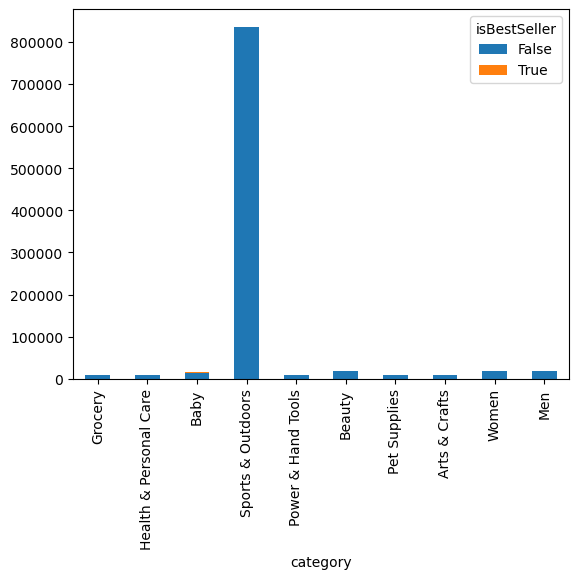

In [24]:
crosstab.sort_values(by=True, ascending=False)[:10].plot(kind="bar", stacked=True)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

In [26]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


0. **Preliminary Step: Remove outliers in product prices.**

In [36]:
df["category"].nunique()

296

In [37]:
def remove_outliers_tukey(group):
    """
    Removes outliers from the 'price' column 
    within each category group using Tukey's method.
    """
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep only prices within bounds
    return group[(group['price'] >= lower_bound) & (group['price'] <= upper_bound)]

df_cleaned = df.groupby('category', group_keys=False).apply(remove_outliers_tukey)

/tmp/ipykernel_34186/88450334.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df.groupby('category', group_keys=False).apply(remove_outliers_tukey)


In [71]:
df_cleaned["category"].nunique()

296

In [72]:
df.shape

(2443651, 9)

In [73]:
df_cleaned.shape

(2177532, 9)

#### 1. Violin Plots

In [75]:
df_cleaned.reset_index(drop=True, inplace=True)

In [76]:
df_cleaned.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,356687,B0C9SZ7DCR,"ELEGOO Neptune 4 3D Printer, 500mm/s High-Spee...",4.8,46,299.99,True,100,3D Printers
1,356688,B09J8GGDXP,Voxelab Aquila C2 FDM 3D Printer with Removabl...,4.2,1262,139.00,False,100,3D Printers


In [128]:
top_20_cat = list(df_cleaned["category"].value_counts()[:20].index)
#top_20_cat = list(df_cleaned["category"].unique()[:20])

In [129]:
top_20_cat

['Sports & Outdoors',
 'Bath & Body',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Skin Care',
 'Hair Care',
 'Manicure & Pedicure Products',
 'Fragrances',
 'Make-up',
 'Birthday Gifts',
 'Handmade Kitchen & Dining',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Handmade Jewellery',
 'Handmade Artwork',
 'Luggage and travel gear',
 'Women',
 'Handmade Home & Kitchen Products',
 'Men',
 'Baby']

In [130]:
top_20_df = df_cleaned.groupby(by="category").get_group(top_20_cat[0])
for i in top_20_cat[1:]:
    top_20_df = pd.concat([top_20_df, df_cleaned.groupby(by="category").get_group(i)])

In [131]:
top_20_df.shape

(1030815, 9)

In [132]:
top_20_df["category"].value_counts()

category
Sports & Outdoors                         710904
Bath & Body                                18193
Beauty                                     17963
Handmade Clothing, Shoes & Accessories     17767
Skin Care                                  17704
Hair Care                                  17652
Manicure & Pedicure Products               17577
Fragrances                                 17150
Make-up                                    17106
Birthday Gifts                             17102
Handmade Kitchen & Dining                  16767
Handmade Gifts                             16763
Handmade Home Décor                        16638
Handmade Jewellery                         16554
Handmade Artwork                           16433
Luggage and travel gear                    16391
Women                                      16293
Handmade Home & Kitchen Products           16040
Men                                        15891
Baby                                       13927
Name: count

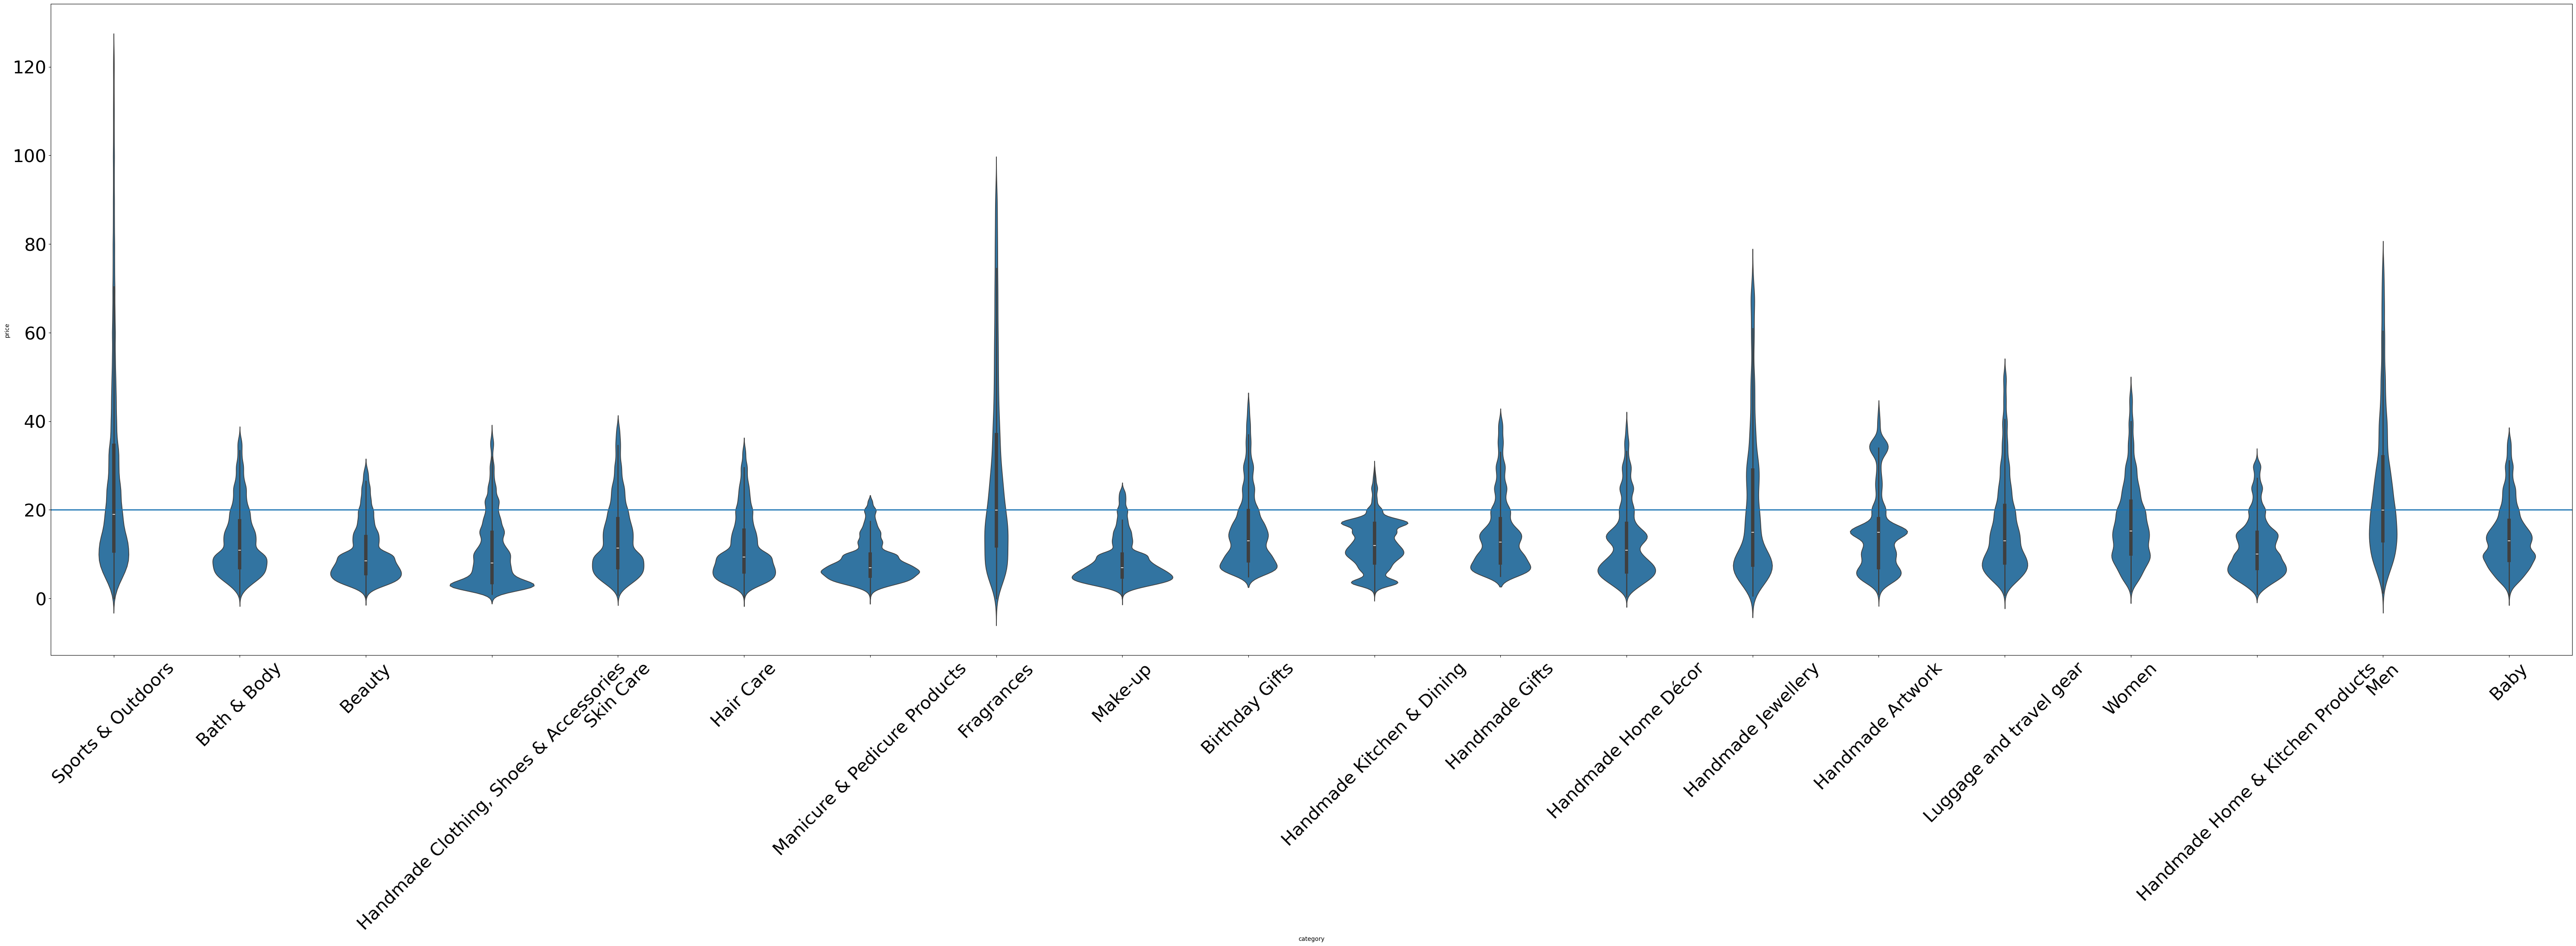

In [151]:
# violin plot
plt.figure(figsize=(60, 16))
plt.axhline(y=20, lw=2)
sns.violinplot(data=top_20_df, x="category", y="price")
plt.tight_layout()
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=30)
plt.show()

It seems like `Fragrances` and `Men` categories have highest median price.

#### 2. Bar Charts

In [152]:
top_20_df["category"].value_counts()

category
Sports & Outdoors                         710904
Bath & Body                                18193
Beauty                                     17963
Handmade Clothing, Shoes & Accessories     17767
Skin Care                                  17704
Hair Care                                  17652
Manicure & Pedicure Products               17577
Fragrances                                 17150
Make-up                                    17106
Birthday Gifts                             17102
Handmade Kitchen & Dining                  16767
Handmade Gifts                             16763
Handmade Home Décor                        16638
Handmade Jewellery                         16554
Handmade Artwork                           16433
Luggage and travel gear                    16391
Women                                      16293
Handmade Home & Kitchen Products           16040
Men                                        15891
Baby                                       13927
Name: count

In [153]:
top_20_df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1330106,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
1330107,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors


In [154]:
top_10_cat = list(df_cleaned["category"].value_counts()[:10].index)
top_10_df = df_cleaned.groupby(by="category").get_group(top_10_cat[0])
for i in top_10_cat[1:]:
    top_10_df = pd.concat([top_10_df, df_cleaned.groupby(by="category").get_group(i)])

In [156]:
top_10_df["category"].value_counts()

category
Sports & Outdoors                         710904
Bath & Body                                18193
Beauty                                     17963
Handmade Clothing, Shoes & Accessories     17767
Skin Care                                  17704
Hair Care                                  17652
Manicure & Pedicure Products               17577
Fragrances                                 17150
Make-up                                    17106
Birthday Gifts                             17102
Name: count, dtype: int64

/tmp/ipykernel_34186/1328281080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, y="category", x="price", palette="coolwarm")


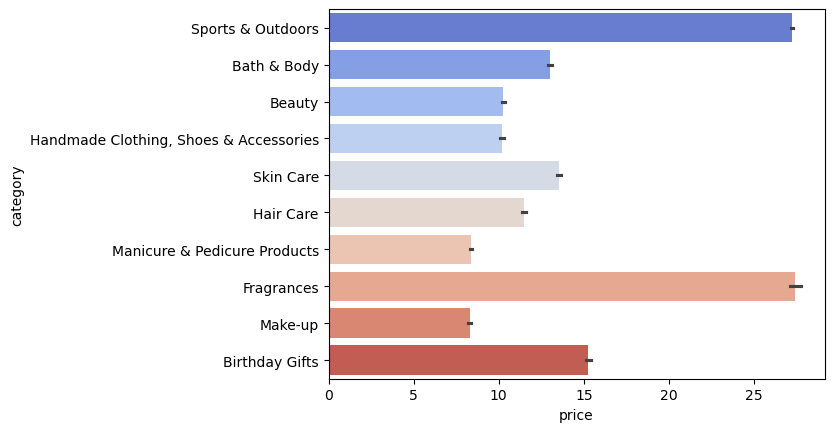

In [160]:
sns.barplot(data=top_10_df, y="category", x="price", palette="coolwarm")
plt.show()

`Fragrances` have highest average price

#### 3. Box Plots

In [163]:
top_10_df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1330106,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
1330107,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors


/tmp/ipykernel_34186/1103905250.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_10_df, y="category", x="stars", palette="coolwarm")


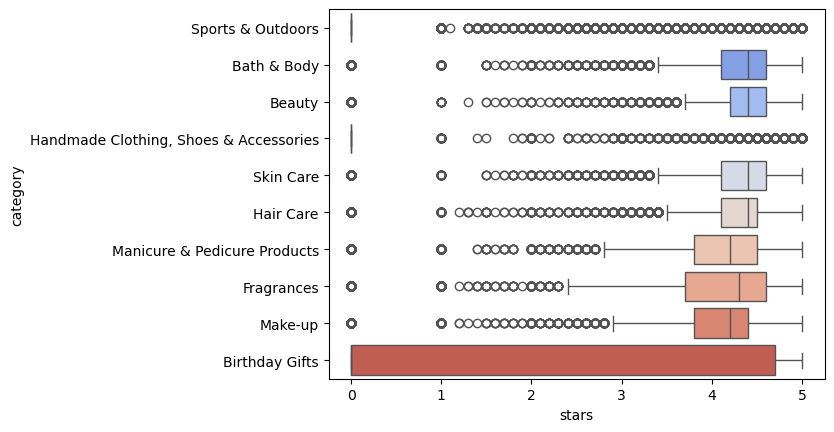

In [165]:
sns.boxplot(data=top_10_df, y="category", x="stars", palette="coolwarm")
plt.show()

In [170]:
top_10_df.groupby("category").get_group("Beauty")["stars"].median()

np.float64(4.4)

In [171]:
top_10_df.groupby("category").get_group("Bath & Body")["stars"].median()

np.float64(4.4)

`Beauty` and `Bath & Body` categories received highest median ratings from customers.

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:

In [173]:
df_cleaned.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,356687,B0C9SZ7DCR,"ELEGOO Neptune 4 3D Printer, 500mm/s High-Spee...",4.8,46,299.99,True,100,3D Printers
1,356688,B09J8GGDXP,Voxelab Aquila C2 FDM 3D Printer with Removabl...,4.2,1262,139.00,False,100,3D Printers


In [174]:
df_cleaned["price"].corr(df_cleaned["stars"])

np.float64(-0.08596654313698485)

The correlation coefficient is very close to zero. So there is no significance correlation between `price` and `stars`.

2. **Visualizations**

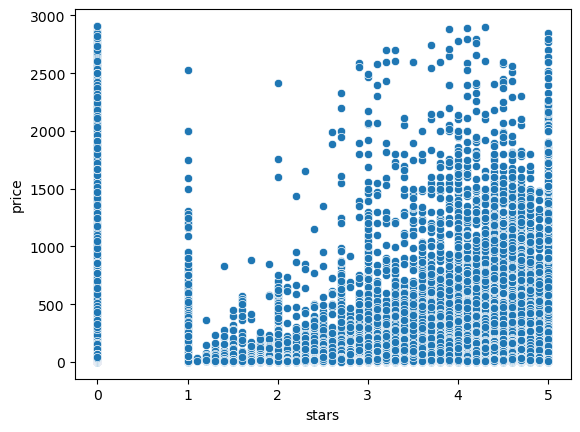

In [176]:
sns.scatterplot(data=df_cleaned, x="stars", y="price")
plt.show()


There is no significant pattern observed as `stars` can be treated as categorical and `price` is numerical.

In [180]:
num = df_cleaned.select_dtypes(include="number")

In [181]:
num.head(2)

,uid,stars,reviews,price,boughtInLastMonth
0,356687,4.8,46,299.99,100
1,356688,4.2,1262,139.00,100


In [182]:
# correlation matrix
cor_mat = num.corr()

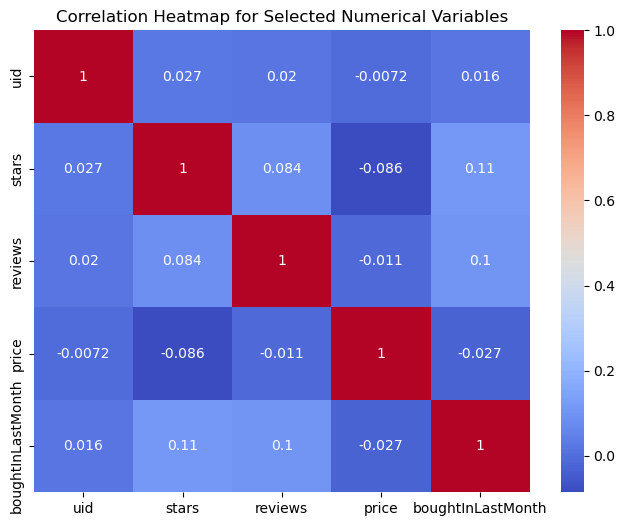

In [184]:
# plot
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(cor_mat, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

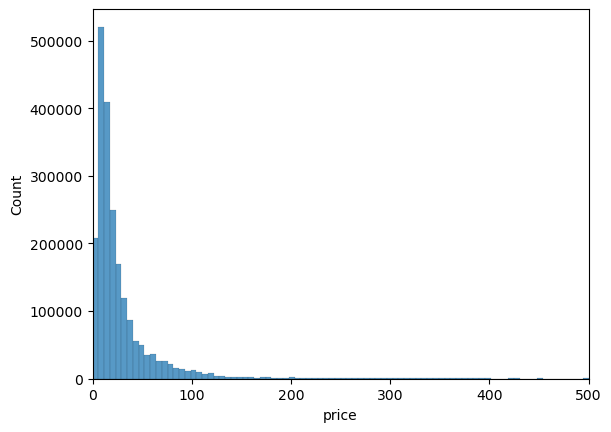

In [ ]:
sns.histplot(x=df_cleaned["price"], bins=500)
plt.xlim(0, 500)
plt.show() #lots of outlier as expected

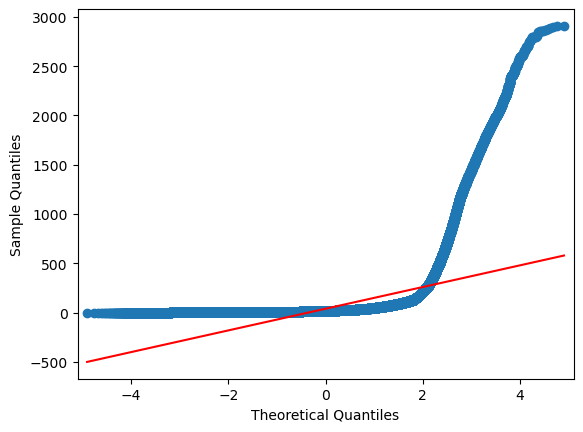

In [190]:
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(df_cleaned["price"], line='s')
plt.show()

The product prices don't follow normal distribution as in the lower tail, the data points lie over the red line and in the upper tail, the data points lie over the red line. There are outliers in both lower tail and upper tail.